# Object Recognition Machine Learning Solution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Xtrain = np.loadtxt("Xtrain.csv",delimiter = ' ')
Ytrain = np.loadtxt("Ytrain.csv",delimiter = ' ')
Xtest = np.loadtxt("Xtest.csv",delimiter = ' ')

In [3]:
Xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
Xtest

array([[12.,  0.,  0., ...,  7.,  0.,  0.],
       [18.,  0., 25., ..., 20., 19.,  0.],
       [29., 15.,  1., ..., 14.,  0., 34.],
       ...,
       [12., 11.,  0., ..., 10.,  0.,  0.],
       [ 0.,  8.,  0., ...,  7., 16., 13.],
       [ 0.,  0.,  0., ..., 24.,  0.,  0.]])

In [5]:
Ytrain

array([-1., -1., -1., ..., -1.,  1., -1.])

## i. Dataset Overview

**a)** How many Examples are in training set? And in the test set ?

In [6]:
Xtrain.shape[0] # Training set where the 28*28 pixel image is present

3000

In [7]:
Ytrain.shape[0] # Training set where labels of Xtrain is present

3000

In [9]:
Xtest.shape[0] # Test set where 28*28 pixel image is present

3000

Training Set: 3000, Test Set: 3000

**b)** Within the training data, count the positive and negative examples. What's the distribution like? Does this distribution signify any potential issues in terms of design of the machine learning solution and its evaluation?

In [10]:
positive_count = np.sum(Ytrain == 1)
negative_count = np.sum(Ytrain == -1)

In [11]:
print("Positive examples:", positive_count)
print("Negative examples:", negative_count)

Positive examples: 311
Negative examples: 2689


In [12]:
distribution = positive_count/len(Xtrain)

In [13]:
distribution

0.10366666666666667

Since the distribution is 0.10366666666666667 it indicates there are 90% negative labels and 10 % positive labels.This indicates a class imbalance, where one class (negative in this case) is significantly more represented than the other.

Biased models: The overwhelming presence of the negative class can lead the model to prioritize learning patterns for that class, neglecting the less frequent positive examples. This results in biased models that favor the majority class and perform poorly on the minority class.

## ii. Visual Data Exploration

**a)** Pick 10 random objects from each class in the training data and display them using plt.matshow. Reshape the flattened 28x28 arrays for this. What patterns or characteristics do you notice?

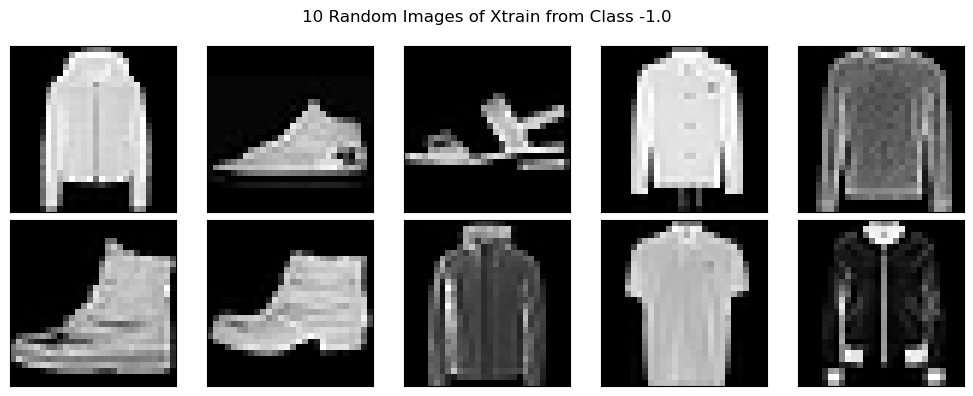

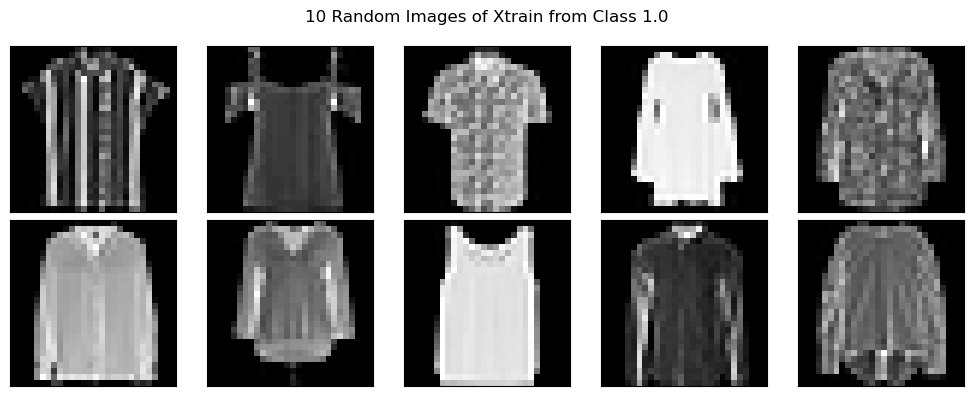

In [14]:
# Iterate through each class and visualize 10 random images
for class_label in np.unique(Ytrain):
    class_images = Xtrain[Ytrain == class_label]

    sampled_indices = np.random.choice(range(len(class_images)), size=10, replace=False)
    sampled_images = class_images[sampled_indices]

    reshaped_images = sampled_images.reshape(-1, 28, 28)

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))

    for i in range(2):
        for j in range(5):
            axes[i, j].matshow(reshaped_images[i * 5 + j], cmap='gray')
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

    fig.suptitle(f'10 Random Images of Xtrain from Class {class_label}')
    plt.tight_layout()
    plt.show()

**Characteristics**
- The Negative class comprises a diverse array of items including shoes, clothing, and other non-apparel objects.

- This class exhibits a higher degree of variability, potentially posing a challenge for the classifier as it must acquire a diverse set of features for accurate classification.

- But when it comes for the positive class it encompasses a range of upper garments like shirts and jackets, exhibiting a more uniform assortment of item types.

- It displays greater uniformity concerning object types, making it a more straightforward task for the classifier to grasp.


**b)** Do the same for 10 random objects from the test set. Are there any peculiarities in the data that might challenge your classifier's ability to generalise?

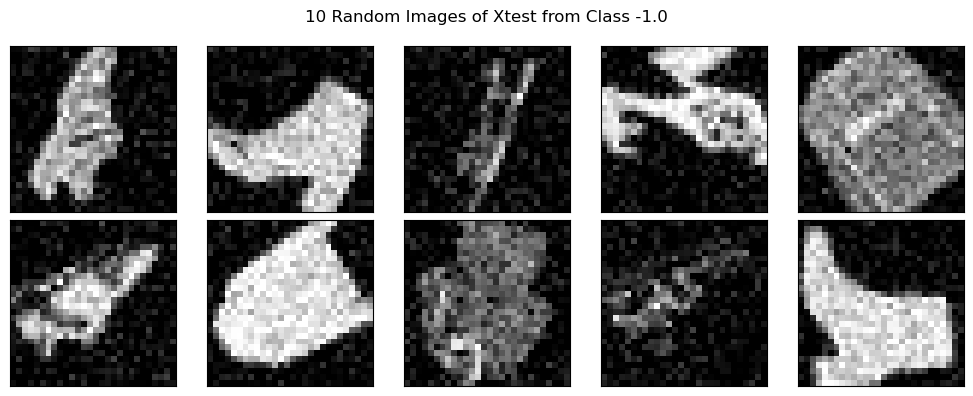

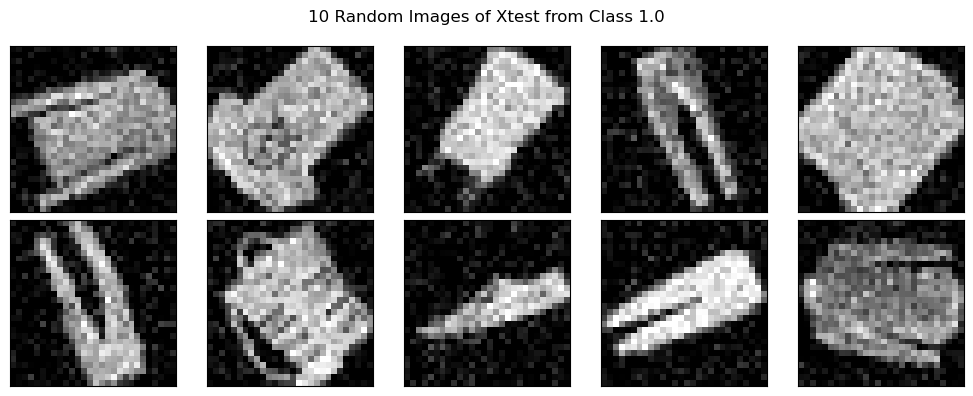

In [15]:
# Iterate through each class and visualize 10 random images
for class_label in np.unique(Ytrain):
    class_images = Xtest[Ytrain == class_label]

    sampled_indices = np.random.choice(range(len(class_images)), size=10, replace=False)
    sampled_images = class_images[sampled_indices]

    reshaped_images = sampled_images.reshape(-1, 28, 28)

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))

    for i in range(2):
        for j in range(5):
            axes[i, j].matshow(reshaped_images[i * 5 + j], cmap='gray')
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

    fig.suptitle(f'10 Random Images of Xtest from Class {class_label}')
    plt.tight_layout()
    plt.show()

**Challenges**
- The Images are blurry, low resolution, grainy structures. The work of the classifier to extract features and learn from it would be difficult.
- No consistency in the test images when we compare with training images. The classifier might not perform well.

## iii) Choosing the Right Metric

Which performance metric would be best for this task (accuracy, AUC-ROC, AUC-PR, F1, Matthews correlation coefficient, mean squared error etc.)? Share your reasoning for this choice.

**Answer**
- As we got to know from the distribution the dataset is imbalance and it is highly skewed towards negative class, so according to the problem AUC-PR and Mathews Correalation Coefficient(MCC) would be best for this task.
- **AUC-PR**:- Area Under the Precision-Recall Curve (AUC-PR) serves as a valuable metric due to its proficiency in identifying the minority class and specifically assessing the performance of that minority class. This characteristic makes it particularly well-suited for scenarios with imbalanced data. By plotting precision against recall, it effectively showcases the model's capability to detect the minority class within heavily skewed negative class data.
- **Matthews Correlation Coefficient (MCC)**:- MCC stands out as an excellent metric for evaluating classifier performance, especially in imbalanced settings. It provides a comprehensive assessment by taking into consideration true positives, true negatives, false positives, and false negatives—all components of the confusion matrix.

## iv) Benchmarking Random Classsifier

Imagine a classifier that randomly guesses labels. What accuracy would you expect it to achieve on both the training and test datasets? Show this through a calculation, statistical proof, or a coding experiment.


**Answer**
Lets take P(positive) is the probability of positive data point and P(negative) as the probability of negative data point. And lets take a random classifier which guesses 'positive' and 'negative'.
- Expected Accuracy for the classifier can be calculated as:
- Classification Accuracy = P(positive) * P(guessing_positive) + P(negative) * P(guessing_negative)
- Now from above findings we know dataset has 10 % positive values and 90 % negative values P(positive) = 0.1, P(negative) = 0.9.
- Next there are only 2 classes.
- So probability of getting positive and negative classes are 50 %.
- P(guessing_positive) = 50% and P(guessing_negative) = 50%
- Classification Accuracy = 0.1 * 0.5 + 0.9 * 0.5
- Classification Accuracy = 0.05 + 0.45 = 0.5

So the expected accuracy of the random classifier would be 0.5 even with imbalanced data

## v) Understanding AUC Metrics from Random Classifier

What would be the AUC-ROC and AUC-PR for a random classifier in this context? Again, support your answer with a mathematical or statistical argument, or a practical demonstration.

**Answer**
- For the ROC curve plot the TPR plot against the FPR at various thresold settings. Now if we take a random classifier which guesses positive and negative examples with 0.5 probability.
- This states that FPR and TPR will increase at same rate as the decision thresold is different.
- This proves the AUC ROC would be 0.5.
- Precision and Recall: For a random classifier, precision will hover around the ratio of positive samples (π) in the dataset, while recall will linearly increase from 0 to 1 as the threshold decreases.
- Precision Calculation: Since the classifier is random, on average, the precision at any threshold will be close to π, the proportion of positive samples in the dataset.
- AUC-PR Calculation: The AUC-PR for a random classifier is equal to π, the proportion of positive samples in the dataset. For a balanced dataset (π = 0.5), the AUC-PR will be 0.5.

# Nearest Neighbour Classifier

i) Perform 5-fold stratified cross-validation over the training dataset using a k-nearest neighbour (kNN) classifier

ii) Plot ROC, PR curve for one fold

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_recall_curve, auc, f1_score, matthews_corrcoef,average_precision_score,roc_curve
import time

   Fold  Training-Time  Accuracy  Balanced Accuracy   ROC AUC    PR AUC  \
0     1       0.003618  0.911667           0.736689  0.859396  0.540386   
1     2       0.003010  0.908333           0.727695  0.863113  0.512952   
2     3       0.004000  0.898333           0.665038  0.851181  0.479917   
3     4       0.003000  0.923333           0.736059  0.888296  0.595787   
4     5       0.003999  0.906667           0.681653  0.822234  0.429255   

   F1 Score       MCC  
0  0.547009  0.499362  
1  0.529915  0.480387  
2  0.429907  0.381459  
3  0.574074  0.540138  
4  0.471698  0.431785  

Summary Statistics:
              Metric   Average  Standard Deviation
0      Training-time  0.003525            0.003525
1           Accuracy  0.909667            0.008124
2  Balanced Accuracy  0.709427            0.030093
3            ROC AUC  0.856844            0.021284
4             PR AUC  0.511659            0.056040
5           F1 Score  0.510520            0.052445
6                MCC  0.466

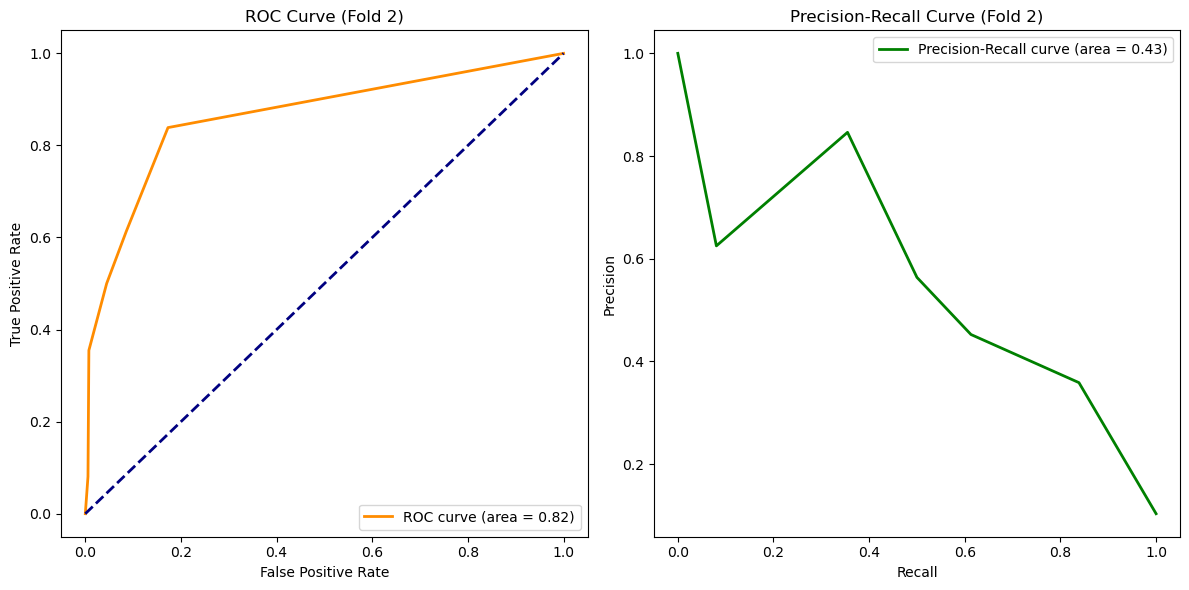

In [17]:

# Set the k value for kNN
k_value = 5

# Initialize kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

# Initialize stratified cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metric values for each fold
accuracy_list = []
balanced_accuracy_list = []
roc_auc_list = []
pr_auc_list = []
f1_list = []
mcc_list = []
fold_list = []



# Lists to store ROC and PR curve data for one fold
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

training_time_list = []

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(stratified_kfold.split(Xtrain, Ytrain)):
    Xtrain_fold, Xval_fold = Xtrain[train_indices], Xtrain[val_indices]
    Ytrain_fold, Yval_fold = Ytrain[train_indices], Ytrain[val_indices]
    
    # Record Start Time
    start_time = time.time()
    
    # Train kNN classifier
    knn_classifier.fit(Xtrain_fold, Ytrain_fold)
    
    # Record End Time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_time_list.append(training_time)
    
    # Predict on validation set
    predictions = knn_classifier.predict(Xval_fold)
    probabilities = knn_classifier.predict_proba(Xval_fold)[:, 1]  # Probabilities for positive class
    
    # Calculate metrics for each fold
    accuracy = accuracy_score(Yval_fold, predictions)
    balanced_accuracy = balanced_accuracy_score(Yval_fold, predictions)
    roc_auc = roc_auc_score(Yval_fold, probabilities)
    pr_auc = average_precision_score(Yval_fold, probabilities)
    f1 = f1_score(Yval_fold, predictions)
    mcc = matthews_corrcoef(Yval_fold, predictions)
    
    # Append metric values to lists
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    roc_auc_list.append(roc_auc)
    pr_auc_list.append(pr_auc)
    f1_list.append(f1)
    mcc_list.append(mcc)
    
    # Calculate ROC curve data
    fpr, tpr, _ = roc_curve(Yval_fold, probabilities)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    # Calculate precision-recall curve data
    precision, recall, _ = precision_recall_curve(Yval_fold, probabilities)
    precision_list.append(precision)
    recall_list.append(recall)
    
    fold_list.append(fold+1)
    
    
    
    
# Create DataFrames for metric lists
accuracy_df = pd.DataFrame({'Accuracy': accuracy_list})
balanced_accuracy_df = pd.DataFrame({'Balanced Accuracy': balanced_accuracy_list})
roc_auc_df = pd.DataFrame({'ROC AUC': roc_auc_list})
pr_auc_df = pd.DataFrame({'PR AUC': pr_auc_list})
f1_df = pd.DataFrame({'F1 Score': f1_list})
mcc_df = pd.DataFrame({'MCC': mcc_list})
fold_df = pd.DataFrame({'Fold': fold_list})
training_time_df = pd.DataFrame({'Training-Time': training_time_list})

# Concatenate DataFrames along columns
metrics_df = pd.concat([fold_df,training_time_df,accuracy_df, balanced_accuracy_df, roc_auc_df, pr_auc_df, f1_df, mcc_df], axis=1)
print(metrics_df)

# Calculate average and standard deviation for each metric
metrics_data = {
    'Metric': ['Training-time','Accuracy', 'Balanced Accuracy', 'ROC AUC', 'PR AUC', 'F1 Score', 'MCC'],
    'Average': [np.mean(training_time_list),np.mean(accuracy_list), np.mean(balanced_accuracy_list), np.mean(roc_auc_list),
                np.mean(pr_auc_list), np.mean(f1_list), np.mean(mcc_list)],
    'Standard Deviation': [np.mean(training_time_list),np.std(accuracy_list), np.std(balanced_accuracy_list), np.std(roc_auc_list),
                           np.std(pr_auc_list), np.std(f1_list), np.std(mcc_list)]
}

# Display the metrics table
metrics_table = pd.DataFrame(metrics_data)
print("\nSummary Statistics:")
print(metrics_table)

# Plot ROC and PR curves for one fold
fold_to_plot = 1  # Change this to the desired fold

plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
if fold_to_plot < len(fpr_list) and fold_to_plot < len(tpr_list):
    plt.plot(fpr_list[fold_to_plot], tpr_list[fold_to_plot], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Fold {})'.format(fold_to_plot + 1))
    plt.legend(loc='lower right')
else:
    print("Invalid fold index for ROC curve.")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
if fold_to_plot < len(precision_list) and fold_to_plot < len(recall_list):
    plt.plot(recall_list[fold_to_plot], precision_list[fold_to_plot], color='green', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Fold {})'.format(fold_to_plot + 1))
    plt.legend(loc='upper right')
else:
    print("Invalid fold index for Precision-Recall curve.")

plt.tight_layout()
plt.show()


**Observations**
- The knn classifier shows a good performance with AUC-ROC curve of 0.82 which has shown that it can distinguish between positive and negative class.
- When it comes to AUC PR curve of 0.43 it states that there is a significant trade-off with precision. You will find this type of values in an imbalance dataset.
- The left hand side of the ROC curve is more important for us because it represents classifier's ability to show correct positive cases with minimal False Positive Cases 

iii) Impacts of Various forms of Pre-Processing

The previous classifier was executed without scaling so lets do Standard Scaling for this and observe

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Using Standard Scaling
   Fold  Training-Time  Accuracy  Balanced Accuracy   ROC AUC    PR AUC  \
0     1       0.002005  0.908333           0.734830  0.867700  0.491219   
1     2       0.003009  0.920000           0.727066  0.878673  0.522806   
2     3       0.004000  0.896667           0.706919  0.848063  0.474607   
3     4       0.004001  0.916667           0.703801  0.899179  0.568860   
4     5       0.004051  0.905000           0.687727  0.846369  0.435114   

   F1 Score       MCC  
0  0.537815  0.487566  
1  0.555556  0.519559  
2  0.483333  0.426289  
3  0.519231  0.486276  
4  0.477064  0.432594  

Summary Statistics:
              Metric   Average  Standard Deviation
0      Training-time  0.003413            0.003413
1           Accuracy  0.909333            0.008340
2  Balanced Accuracy  0.712069            0.016914
3            ROC AUC  0.867997            0.019756
4             PR AUC  0.498521            0.045128
5           F1 Score  0.514600            0.030411
6   

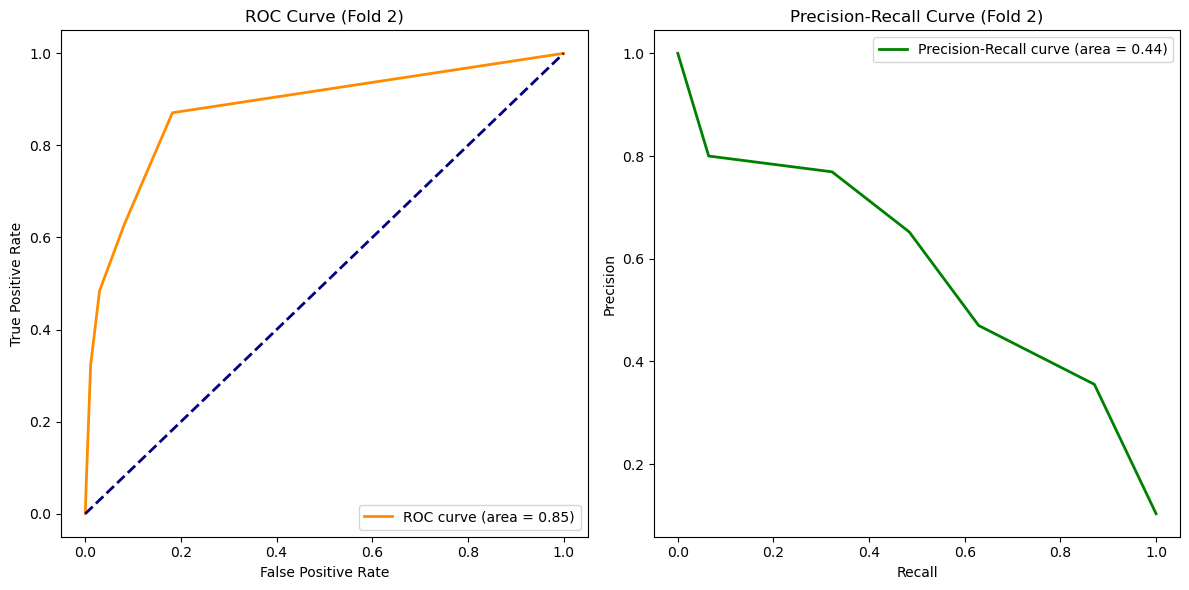

In [19]:

# Set the k value for kNN
k_value = 5

# Initialize kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

# Initialize stratified cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metric values for each fold
accuracy_list = []
balanced_accuracy_list = []
roc_auc_list = []
pr_auc_list = []
f1_list = []
mcc_list = []
fold_list = []



# Lists to store ROC and PR curve data for one fold
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

training_time_list = []

# Apply Standard Scaling
scaler = StandardScaler()

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(stratified_kfold.split(Xtrain, Ytrain)):
    Xtrain_fold, Xval_fold = Xtrain[train_indices], Xtrain[val_indices]
    Ytrain_fold, Yval_fold = Ytrain[train_indices], Ytrain[val_indices]
    
    # Apply pre-processing
    Xtrain_fold = scaler.fit_transform(Xtrain_fold)
    Xval_fold = scaler.transform(Xval_fold)
    
    # Record Start Time
    start_time = time.time()
    
    # Train kNN classifier
    knn_classifier.fit(Xtrain_fold, Ytrain_fold)
    
    # Record End Time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_time_list.append(training_time)
    
    # Predict on validation set
    predictions = knn_classifier.predict(Xval_fold)
    probabilities = knn_classifier.predict_proba(Xval_fold)[:, 1]  # Probabilities for positive class
    
    # Calculate metrics for each fold
    accuracy = accuracy_score(Yval_fold, predictions)
    balanced_accuracy = balanced_accuracy_score(Yval_fold, predictions)
    roc_auc = roc_auc_score(Yval_fold, probabilities)
    pr_auc = average_precision_score(Yval_fold, probabilities)
    f1 = f1_score(Yval_fold, predictions)
    mcc = matthews_corrcoef(Yval_fold, predictions)
    
    # Append metric values to lists
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    roc_auc_list.append(roc_auc)
    pr_auc_list.append(pr_auc)
    f1_list.append(f1)
    mcc_list.append(mcc)
    
    # Calculate ROC curve data
    fpr, tpr, _ = roc_curve(Yval_fold, probabilities)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    # Calculate precision-recall curve data
    precision, recall, _ = precision_recall_curve(Yval_fold, probabilities)
    precision_list.append(precision)
    recall_list.append(recall)
    
    fold_list.append(fold+1)
    
    
    
    
# Create DataFrames for metric lists
accuracy_df = pd.DataFrame({'Accuracy': accuracy_list})
balanced_accuracy_df = pd.DataFrame({'Balanced Accuracy': balanced_accuracy_list})
roc_auc_df = pd.DataFrame({'ROC AUC': roc_auc_list})
pr_auc_df = pd.DataFrame({'PR AUC': pr_auc_list})
f1_df = pd.DataFrame({'F1 Score': f1_list})
mcc_df = pd.DataFrame({'MCC': mcc_list})
fold_df = pd.DataFrame({'Fold': fold_list})
training_time_df = pd.DataFrame({'Training-Time': training_time_list})

print("Using Standard Scaling")

# Concatenate DataFrames along columns
metrics_df = pd.concat([fold_df,training_time_df,accuracy_df, balanced_accuracy_df, roc_auc_df, pr_auc_df, f1_df, mcc_df], axis=1)
print(metrics_df)

# Calculate average and standard deviation for each metric
metrics_data = {
    'Metric': ['Training-time','Accuracy', 'Balanced Accuracy', 'ROC AUC', 'PR AUC', 'F1 Score', 'MCC'],
    'Average': [np.mean(training_time_list),np.mean(accuracy_list), np.mean(balanced_accuracy_list), np.mean(roc_auc_list),
                np.mean(pr_auc_list), np.mean(f1_list), np.mean(mcc_list)],
    'Standard Deviation': [np.mean(training_time_list),np.std(accuracy_list), np.std(balanced_accuracy_list), np.std(roc_auc_list),
                           np.std(pr_auc_list), np.std(f1_list), np.std(mcc_list)]
}

# Display the metrics table
metrics_table = pd.DataFrame(metrics_data)
print("\nSummary Statistics:")
print(metrics_table)

# Plot ROC and PR curves for one fold
fold_to_plot = 1  # Change this to the desired fold

plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
if fold_to_plot < len(fpr_list) and fold_to_plot < len(tpr_list):
    plt.plot(fpr_list[fold_to_plot], tpr_list[fold_to_plot], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Fold {})'.format(fold_to_plot + 1))
    plt.legend(loc='lower right')
else:
    print("Invalid fold index for ROC curve.")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
if fold_to_plot < len(precision_list) and fold_to_plot < len(recall_list):
    plt.plot(recall_list[fold_to_plot], precision_list[fold_to_plot], color='green', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Fold {})'.format(fold_to_plot + 1))
    plt.legend(loc='upper right')
else:
    print("Invalid fold index for Precision-Recall curve.")

plt.tight_layout()
plt.show()


**Findings from Standard Scaler:**
- The classifier demonstrates satisfactory performance, boasting an average accuracy of approximately 91% over the five folds.

- The mean balanced accuracy hovers around 71%, indicating a disparity between classes within the dataset.

- The average AUC-ROC score is notably high, reaching around 87%, underscoring the classifier's strong discriminative capabilities.

- The ROC curve, with an AUC of 0.85, illustrates the classifier's ability to effectively differentiate between positive and negative classes, surpassing random chance.

- The PR curve, with an AUC of 0.44, underscores the difficulty in maintaining high precision across various levels of recall. - This challenge is likely attributed to class imbalance, with the positive class being underrepresented.

Now lets do with Min Max Scaling

Using Min-Max Scaling
   Fold  Training-Time  Accuracy  Balanced Accuracy   ROC AUC    PR AUC  \
0     1       0.003001  0.913333           0.744754  0.858601  0.542830   
1     2       0.003000  0.910000           0.728625  0.863698  0.520471   
2     3       0.003001  0.898333           0.665038  0.849682  0.472681   
3     4       0.003997  0.921667           0.727995  0.887711  0.583311   
4     5       0.004006  0.903333           0.672785  0.818805  0.419212   

   F1 Score       MCC  
0  0.559322  0.512215  
1  0.534483  0.486347  
2  0.429907  0.381459  
3  0.560748  0.526974  
4  0.452830  0.410707  

Summary Statistics:
              Metric   Average  Standard Deviation
0      Training-time  0.003401            0.003401
1           Accuracy  0.909333            0.008069
2  Balanced Accuracy  0.707839            0.032440
3            ROC AUC  0.855700            0.022336
4             PR AUC  0.507701            0.056870
5           F1 Score  0.507458            0.055242
6    

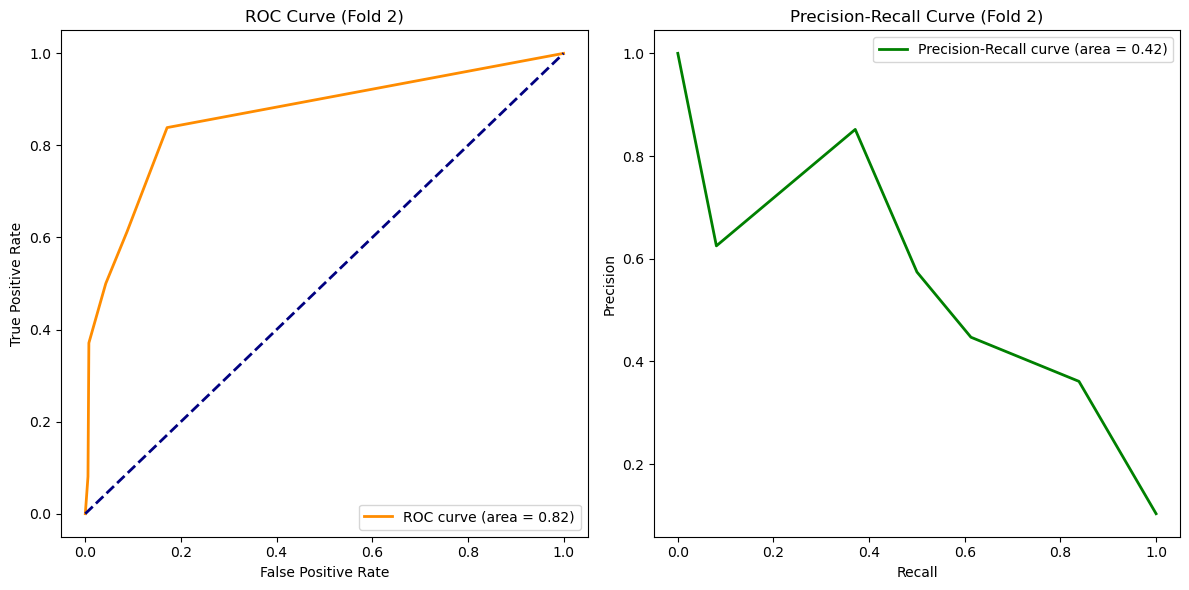

In [20]:
# Set the k value for kNN
k_value = 5

# Initialize kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

# Initialize stratified cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metric values for each fold
accuracy_list = []
balanced_accuracy_list = []
roc_auc_list = []
pr_auc_list = []
f1_list = []
mcc_list = []
fold_list = []



# Lists to store ROC and PR curve data for one fold
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

training_time_list = []

# Apply Min Max Scaler
scaler = MinMaxScaler()

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(stratified_kfold.split(Xtrain, Ytrain)):
    Xtrain_fold, Xval_fold = Xtrain[train_indices], Xtrain[val_indices]
    Ytrain_fold, Yval_fold = Ytrain[train_indices], Ytrain[val_indices]
    
    # Apply pre-processing
    Xtrain_fold = scaler.fit_transform(Xtrain_fold)
    Xval_fold = scaler.transform(Xval_fold)
    
    # Record Start Time
    start_time = time.time()
    
    # Train kNN classifier
    knn_classifier.fit(Xtrain_fold, Ytrain_fold)
    
    # Record End Time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_time_list.append(training_time)
    
    # Predict on validation set
    predictions = knn_classifier.predict(Xval_fold)
    probabilities = knn_classifier.predict_proba(Xval_fold)[:, 1]  # Probabilities for positive class
    
    # Calculate metrics for each fold
    accuracy = accuracy_score(Yval_fold, predictions)
    balanced_accuracy = balanced_accuracy_score(Yval_fold, predictions)
    roc_auc = roc_auc_score(Yval_fold, probabilities)
    pr_auc = average_precision_score(Yval_fold, probabilities)
    f1 = f1_score(Yval_fold, predictions)
    mcc = matthews_corrcoef(Yval_fold, predictions)
    
    # Append metric values to lists
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    roc_auc_list.append(roc_auc)
    pr_auc_list.append(pr_auc)
    f1_list.append(f1)
    mcc_list.append(mcc)
    
    # Calculate ROC curve data
    fpr, tpr, _ = roc_curve(Yval_fold, probabilities)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    # Calculate precision-recall curve data
    precision, recall, _ = precision_recall_curve(Yval_fold, probabilities)
    precision_list.append(precision)
    recall_list.append(recall)
    
    fold_list.append(fold+1)
    
    
    
    
# Create DataFrames for metric lists
accuracy_df = pd.DataFrame({'Accuracy': accuracy_list})
balanced_accuracy_df = pd.DataFrame({'Balanced Accuracy': balanced_accuracy_list})
roc_auc_df = pd.DataFrame({'ROC AUC': roc_auc_list})
pr_auc_df = pd.DataFrame({'PR AUC': pr_auc_list})
f1_df = pd.DataFrame({'F1 Score': f1_list})
mcc_df = pd.DataFrame({'MCC': mcc_list})
fold_df = pd.DataFrame({'Fold': fold_list})
training_time_df = pd.DataFrame({'Training-Time': training_time_list})

print("Using Min-Max Scaling")

# Concatenate DataFrames along columns
metrics_df = pd.concat([fold_df,training_time_df,accuracy_df, balanced_accuracy_df, roc_auc_df, pr_auc_df, f1_df, mcc_df], axis=1)
print(metrics_df)

# Calculate average and standard deviation for each metric
metrics_data = {
    'Metric': ['Training-time','Accuracy', 'Balanced Accuracy', 'ROC AUC', 'PR AUC', 'F1 Score', 'MCC'],
    'Average': [np.mean(training_time_list),np.mean(accuracy_list), np.mean(balanced_accuracy_list), np.mean(roc_auc_list),
                np.mean(pr_auc_list), np.mean(f1_list), np.mean(mcc_list)],
    'Standard Deviation': [np.mean(training_time_list),np.std(accuracy_list), np.std(balanced_accuracy_list), np.std(roc_auc_list),
                           np.std(pr_auc_list), np.std(f1_list), np.std(mcc_list)]
}

# Display the metrics table
metrics_table = pd.DataFrame(metrics_data)
print("\nSummary Statistics:")
print(metrics_table)

# Plot ROC and PR curves for one fold
fold_to_plot = 1  # Change this to the desired fold

plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
if fold_to_plot < len(fpr_list) and fold_to_plot < len(tpr_list):
    plt.plot(fpr_list[fold_to_plot], tpr_list[fold_to_plot], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Fold {})'.format(fold_to_plot + 1))
    plt.legend(loc='lower right')
else:
    print("Invalid fold index for ROC curve.")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
if fold_to_plot < len(precision_list) and fold_to_plot < len(recall_list):
    plt.plot(recall_list[fold_to_plot], precision_list[fold_to_plot], color='green', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Fold {})'.format(fold_to_plot + 1))
    plt.legend(loc='upper right')
else:
    print("Invalid fold index for Precision-Recall curve.")

plt.tight_layout()
plt.show()


**Findings:**

- Employing various scaling techniques yielded minimal variances in mean accuracy, suggesting that scaling had limited influence on the classifier's performance in this dataset.
- Standard Scaler demonstrated a slight enhancement in mean AUC-PR and MCC, indicating some advantages in terms of precision and achieving a balance between different types of classification errors.
- Training time was shortest without scaling, with negligible differences observed among the scaling methods. This implies that scaling does not markedly impact training speed.

# Cross Validation of SVM and RFs

Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: SVMs (linear, polynomial kernels and Radial Basis Function Kernels) and Random Forest Classifiers.

i) Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier.

My Strategy is to apply all 4 classifiers distinguishly with different hyperparameters having common scoring metrics and after that do GridSearchCV for each classifier to get optimal model and optimal hyperparameters. I am not scaling the data because as mentioned before it doesnt affect that much.

ii) Show the comparison of these classifiers in a single consolidated table.

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score, roc_curve, auc, precision_recall_curve


In [22]:
# Define classifiers and their respective hyperparameter grids

linear_SVM = SVC(kernel='linear', probability=True)
poly_SVM = SVC(kernel='poly', probability=True)
rbf_SVM = SVC(kernel='rbf', probability=True)
random_forest = RandomForestClassifier()

linear_SVM.fit(Xtrain,Ytrain)
poly_SVM.fit(Xtrain,Ytrain)
rbf_SVM.fit(Xtrain,Ytrain)
random_forest.fit(Xtrain,Ytrain)


param_Linear_SVM = {'C': [0.1,1,10]},
param_Poly_SVM = {'C': [0.1, 1, 10], 'degree': [2,3,4], 'gamma': ['scale', 'auto']},
param_RBF_SVM = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
param_Random_Forest = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4 ]}


# Define evaluation metrics for GridSearchCV
scoring_metrics = {
    'Accuracy': 'accuracy',
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC-ROC': 'roc_auc',
    'AUC-PR': 'average_precision'
}
# Consolidate results in a table
results_table = {'Classifier': [], 'Accuracy': [], 'Balanced Accuracy': [], 'AUC-ROC': [], 'AUC-PR': []}
# Consolidate summary in a table
summary_table = {'Classifier': [], 'Mean Accuracy': [], 'Std Accuracy': [], 'Mean Balanced Accuracy': [], 'Std Balanced Accuracy': [],
                 'Mean AUC-ROC': [], 'Std AUC-ROC': [], 'Mean AUC-PR': [], 'Std AUC-PR': []}


# Initialize StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Execute GridSearchCV for all classifiers
linear_svm_grid_search = GridSearchCV(linear_SVM, param_Linear_SVM, cv=stratified_kfold, scoring=scoring_metrics, refit='AUC-PR', n_jobs=-1)
linear_svm_grid_search.fit(Xtrain, Ytrain)
poly_svm_grid_search = GridSearchCV(poly_SVM, param_Poly_SVM, cv=stratified_kfold, scoring=scoring_metrics, refit='AUC-PR', n_jobs=-1)
poly_svm_grid_search.fit(Xtrain, Ytrain)
rbf_svm_grid_search = GridSearchCV(rbf_SVM, param_RBF_SVM, cv=stratified_kfold, scoring=scoring_metrics, refit='AUC-PR', n_jobs=-1)
rbf_svm_grid_search.fit(Xtrain, Ytrain)
rf_grid_search = GridSearchCV(random_forest, param_Random_Forest, cv=stratified_kfold, scoring=scoring_metrics, refit='AUC-PR', n_jobs=-1)
rf_grid_search.fit(Xtrain, Ytrain)

# Find best estimator for all classifiers
best_linear_svm = linear_svm_grid_search.best_estimator_
best_poly_svm = poly_svm_grid_search.best_estimator_
best_rbf_svm = rbf_svm_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

# Extract Cross Validation Results for all classifiers
linear_svm_cv_results = linear_svm_grid_search.cv_results_
poly_svm_cv_results = poly_svm_grid_search.cv_results_
rbf_svm_cv_results = rbf_svm_grid_search.cv_results_
rf_cv_results = rf_grid_search.cv_results_

# A summary Table for all classifers and their metrics
for name, cv_results in zip(['Linear_SVM','Poly_SVM','RBF_SVM','Random Forest'], [linear_svm_cv_results,poly_svm_cv_results,rbf_svm_cv_results,rf_cv_results]):
    summary_table['Classifier'].append(name)
    summary_table['Mean Accuracy'].append(np.mean(cv_results['mean_test_Accuracy']))
    summary_table['Std Accuracy'].append(np.std(cv_results['std_test_Accuracy']))
    summary_table['Mean Balanced Accuracy'].append(np.mean(cv_results['mean_test_Balanced Accuracy']))
    summary_table['Std Balanced Accuracy'].append(np.std(cv_results['std_test_Balanced Accuracy']))
    summary_table['Mean AUC-ROC'].append(np.mean(cv_results['mean_test_AUC-ROC']))
    summary_table['Std AUC-ROC'].append(np.std(cv_results['std_test_AUC-ROC']))
    summary_table['Mean AUC-PR'].append(np.mean(cv_results['mean_test_AUC-PR']))
    summary_table['Std AUC-PR'].append(np.std(cv_results['std_test_AUC-PR']))

results_df = pd.DataFrame(summary_table)
print(results_df)


      Classifier  Mean Accuracy  Std Accuracy  Mean Balanced Accuracy  \
0     Linear_SVM       0.884000      0.000000                0.727647   
1       Poly_SVM       0.913593      0.002156                0.706688   
2        RBF_SVM       0.906833      0.003783                0.567942   
3  Random Forest       0.924292      0.001149                0.648963   

   Std Balanced Accuracy  Mean AUC-ROC  Std AUC-ROC  Mean AUC-PR  Std AUC-PR  
0               0.000000      0.877789     0.000000     0.444612    0.000000  
1               0.010535      0.890445     0.003312     0.577284    0.006515  
2               0.011455      0.729743     0.006944     0.422744    0.020124  
3               0.004676      0.936744     0.002204     0.712330    0.006235  


iii) Plot the ROC curves of all classifiers on the same axes for easy comparison.

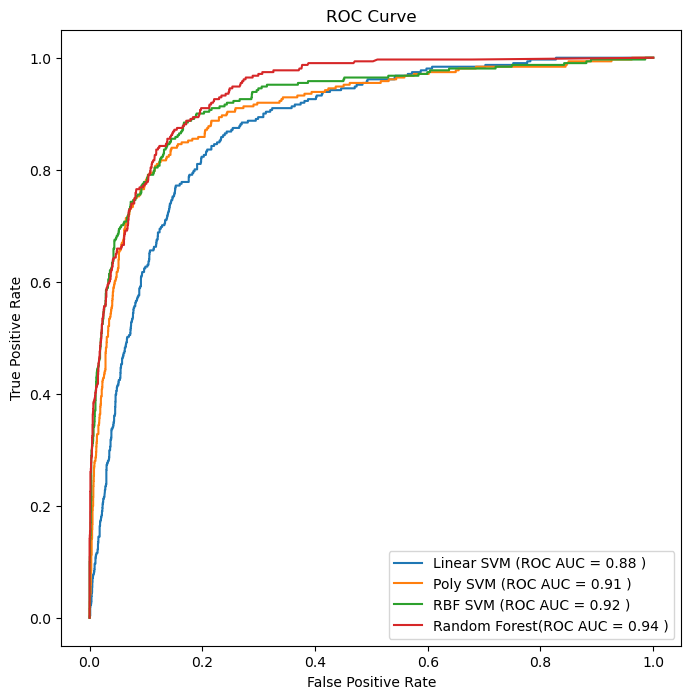

In [59]:
# ROC Curve 
plt.figure(figsize=(8, 8))
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(Ytrain, cross_val_predict(best_linear_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
linear_roc_auc = auc(fpr_svm_linear, tpr_svm_linear)

fpr_svm_poly, tpr_svm_poly, _ = roc_curve(Ytrain, cross_val_predict(best_poly_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
poly_roc_auc = auc(fpr_svm_poly, tpr_svm_poly)

fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(Ytrain, cross_val_predict(best_rbf_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
rbf_roc_auc = auc(fpr_svm_rbf, tpr_svm_rbf)

fpr_rf, tpr_rf, _ = roc_curve(Ytrain, cross_val_predict(best_rf, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
rf_roc_auc = auc(fpr_rf, tpr_rf)

plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"Linear SVM (ROC AUC = {linear_roc_auc:.2f} )")
plt.plot(fpr_svm_poly, tpr_svm_poly, label=f"Poly SVM (ROC AUC = {poly_roc_auc:.2f} )")
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f"RBF SVM (ROC AUC = {rbf_roc_auc:.2f} )")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest(ROC AUC = {rf_roc_auc:.2f} )")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

iv) Plot the PR curves of all classifiers on the same axes for comparison. 

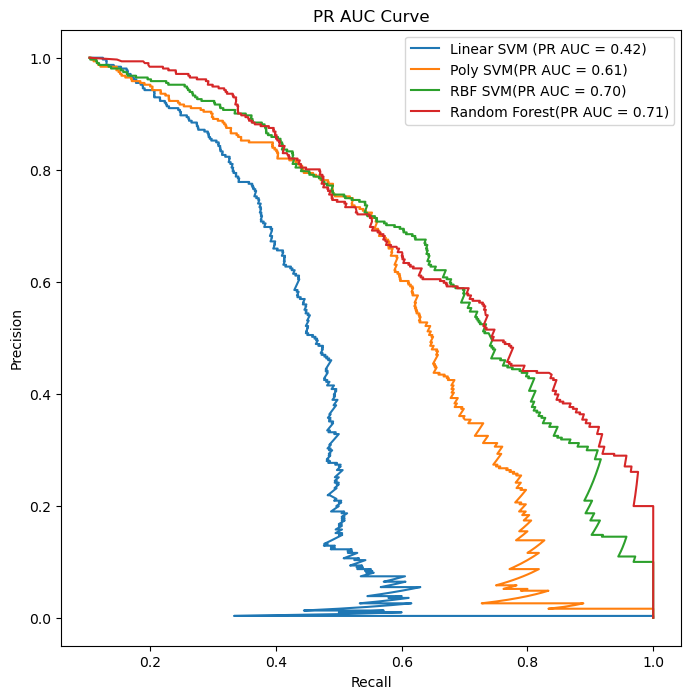

In [60]:
# PR curve
plt.figure(figsize=(8, 8))
recall_svm_linear, precision_svm_linear, _ = precision_recall_curve(Ytrain,cross_val_predict(best_linear_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
linear_pr_auc = average_precision_score(Ytrain,cross_val_predict(best_linear_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
recall_svm_poly, precision_svm_poly, _ = precision_recall_curve(Ytrain,cross_val_predict(best_poly_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
poly_pr_auc = average_precision_score(Ytrain,cross_val_predict(best_poly_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
recall_svm_rbf, precision_svm_rbf, _ = precision_recall_curve(Ytrain, cross_val_predict(best_rbf_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
rbf_pr_auc = average_precision_score(Ytrain,cross_val_predict(best_rbf_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
recall_rf, precision_rf, _ = precision_recall_curve(Ytrain,cross_val_predict(best_rf, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
linear_pr_auc = average_precision_score(Ytrain,cross_val_predict(best_linear_svm, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])
rf_pr_auc = average_precision_score(Ytrain,cross_val_predict(best_rf, Xtrain, Ytrain, cv=stratified_kfold, method='predict_proba')[:, 1])

plt.plot(recall_svm_linear, precision_svm_linear, label=f"Linear SVM (PR AUC = {linear_pr_auc:.2f})")
plt.plot(recall_svm_poly, precision_svm_poly, label=f"Poly SVM(PR AUC = {poly_pr_auc:.2f})")
plt.plot(recall_svm_rbf, precision_svm_rbf, label=f"RBF SVM(PR AUC = {rbf_pr_auc:.2f})")
plt.plot(recall_rf, precision_rf, label=f"Random Forest(PR AUC = {rf_pr_auc:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR AUC Curve')
plt.legend()

iv) Write your observations about the ROC and PR curves.

**Observations**
- From ROC curve we can see the two best classifiers are Radial Basis function classifier of ROC AUC 0.92 and Random Forest Classifier of ROC AUC 0.94.
- From PR curve we can see the best two classifiers are Radial Basis Function classifier of PR AUC 0.7 and Random Forest Classifier of PR AUC 0.71.
- We will use these two classifiers to get best optimal results for our further tasks.

I am also getting their best Hyperparameters for our reference and their best score for our reference

In [49]:
# Finding Best Parameters of RBF SVM and best score
print(f"Best Hyperparameters for RBF SVM : {rbf_svm_grid_search.best_params_}")
print(f"Best Score for RBF SVM: {rbf_svm_grid_search.best_score_}")

Best Hyperparameters for RBF SVM : {'C': 10, 'gamma': 'scale'}
Best Score for RBF SVM: 0.7024428217207317


In [50]:
# Finding Best Hyperparameters for Random Forest and best score
print(f"Best Hyperparameter for Random Forest Classifier: {rf_grid_search.best_params_}")
print(f"Best Score for Random Forest Classifier: {rf_grid_search.best_score_}")

Best Hyperparameter for Random Forest Classifier: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest Classifier: 0.7317298883532307


# PCA

i) Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different colour. What are your observations about the data based on this plot?


ii) Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different colour (or marker style). What are your observations about the data based on this plot? 

iii) Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

iv) Reduce the number of dimensions of the data using PCA and perform classification.  You may want to select different principal components for the classification (not necessarily the first few). What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

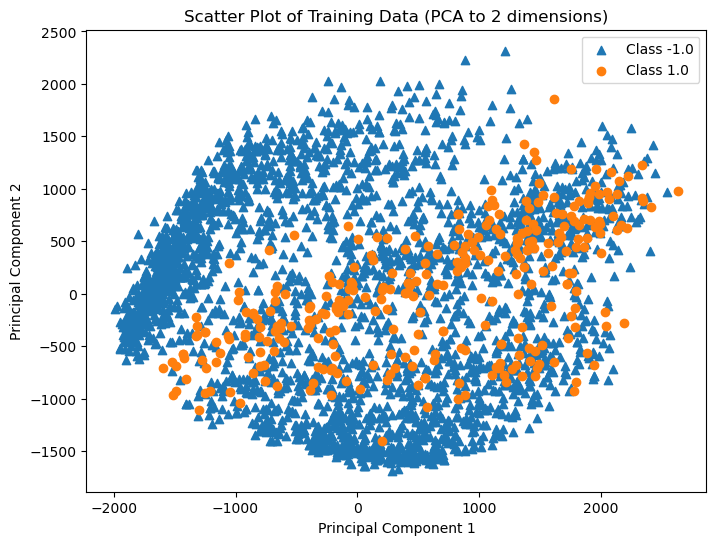

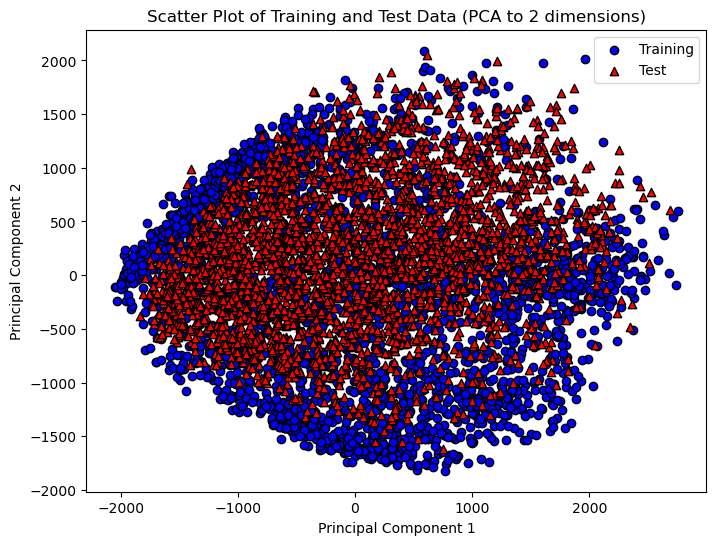

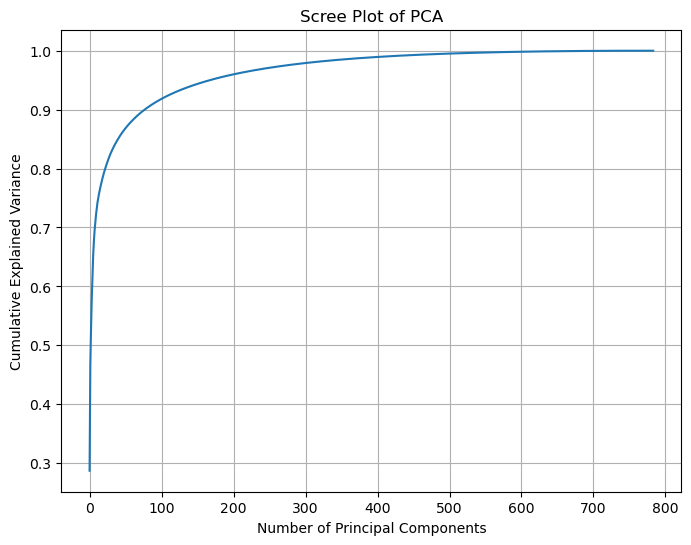

Number of dimensions explaining 95% variance: 168

Radial basis Function as Classifier Kernel
Best hyperparameters for Kernelized SVM with PCA: {'classifier__C': 10, 'classifier__degree': 2, 'classifier__kernel': 'rbf', 'pca__n_components': 50}
Best Score for Kernelized SVM with PCA: 0.9305255774481618
Cross-Validation Accuracy (Kernelized SVM with PCA): [0.92       0.94333333 0.91833333 0.93333333 0.93      ]
Mean Accuracy for Kernelized SVM: 0.9289999999999999
Standard Deviation of Accuracy for Kernelized SVM: 0.009165151389911683


In [25]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


# Reduce the number of dimensions of the training data using PCA to 2
pca_2d = PCA(n_components=2)
Xtrain_pca_2d = pca_2d.fit_transform(Xtrain)

# Plot scatter plot of the training data
plt.figure(figsize=(8, 6))
# Plot each class separately to add separate markers and labels for each class
for class_label in np.unique(Ytrain):
    indices = Ytrain == class_label
    plt.scatter(Xtrain_pca_2d[indices, 0], Xtrain_pca_2d[indices, 1], label=f'Class {class_label}', marker='o' if class_label == 1 else '^')

plt.title('Scatter Plot of Training Data (PCA to 2 dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Reduce the number of dimensions of the training and test data together using PCA to 2
pca_2d_combined = PCA(n_components=2)
X_combined = np.vstack((Xtrain, Xtest))
X_combined_pca_2d = pca_2d_combined.fit_transform(X_combined)

# Plot scatter plot of the training and test data
plt.figure(figsize=(8, 6))
plt.scatter(X_combined_pca_2d[:len(Xtrain), 0], X_combined_pca_2d[:len(Xtrain), 1], c='blue', label='Training', marker='o', edgecolor='k')
plt.scatter(X_combined_pca_2d[len(Xtrain):, 0], X_combined_pca_2d[len(Xtrain):, 1], c='red', label='Test', marker='^', edgecolor='k')
plt.title('Scatter Plot of Training and Test Data (PCA to 2 dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plot the scree graph of PCA and find the number of dimensions explaining 95% variance in the training set
pca_full = PCA()
pca_full.fit(Xtrain)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Plot scree graph
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot of PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Find the number of dimensions that explain 95% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_dimensions_95_percent = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of dimensions explaining 95% variance: {num_dimensions_95_percent}")

# Reduce the number of dimensions using PCA and perform classification with Kernelized SVM
print("\nRadial basis Function as Classifier Kernel")

pipeline = Pipeline([('pca',PCA()),('classifier',SVC(probability=True))])

# Hyperparameter optimization for Kernelized SVM with PCA
svm_param_grid = {
    'classifier__C': [0.1,1,10],
    'classifier__kernel': ['rbf'],
    'classifier__degree': [2,3,4],
    'pca__n_components': [50,100,200]
}

# Perform GridSearchCV
svm_grid_search = GridSearchCV(pipeline, svm_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
svm_grid_search.fit(Xtrain,Ytrain)

# Print the best hyperparameters
print("Best hyperparameters for Kernelized SVM with PCA:", svm_grid_search.best_params_)
print("Best Score for Kernelized SVM with PCA:", svm_grid_search.best_score_)

# Get cross-validation performance
svm_cross_val_accuracy = cross_val_score(svm_grid_search.best_estimator_, pca_full.transform(Xtrain)[:, :num_dimensions_95_percent], Ytrain, cv=5, scoring='accuracy')

# Print the cross-validation performance
print("Cross-Validation Accuracy (Kernelized SVM with PCA):", svm_cross_val_accuracy)
print("Mean Accuracy for Kernelized SVM:", np.mean(svm_cross_val_accuracy))
print("Standard Deviation of Accuracy for Kernelized SVM:", np.std(svm_cross_val_accuracy))





**Findings for Scatter plot of training data (PCA to 2 dimensions) :**

- Notable intersection exists between the two classes, indicating that the data lacks linear separability in the reduced space. This poses a difficulty for linear models in achieving high classification accuracy.

- The blue and orange data points appear to be dispersed uniformly across the space, lacking a distinct boundary or clustered pattern.

- The absence of clear clustering presents a hurdle for clustering algorithms or models relying on the assumption that distinct classes form discernible groups.

- These observations imply that classification models may need more intricate decision boundaries than those offered by the initial two principal components.

**Findings for Scatter plot of training data and test data (PCA to 2 dimensions):**

- Noteworthy overlap exists between the training and test data points, indicating that the PCA transformation effectively captures and retains the distribution of the original high-dimensional data.
- Both training and test sets exhibit considerable dispersion across the first two principal components, suggesting substantial variability in the data. However, there is no evident linear separation between the two classes based on these components.
- The absence of clearly defined clusters signifies that simple linear models may not yield effective performance.
- The comparable shape and distribution of points in the scatter plot for both training and test sets indicate that PCA components have similarly captured the data's variance for both sets. This implies that, for model generalization, the test set doesn't fundamentally differ in structure from the training set.

# Optimal Pipeline

Developing an optimal pipeline for classification based on the analysis 

**Answer**
- Since we have already found out best score for rbf classifier with pca lets do it for random forest as well

In [26]:
pipeline = Pipeline([('pca',PCA()),('classifier',RandomForestClassifier())])
rf_param_grid = {
    'classifier__n_estimators': [50,100,150],
    'classifier__max_depth': [5,10,20],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,4,]
}
# Perform GridSearchCV
rf_grid_search = GridSearchCV(pipeline, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(Xtrain,Ytrain)
# Print the best hyperparameters
print("Best hyperparameters for Kernelized RF with PCA:", rf_grid_search.best_params_)
print("Best Score for RF with PCA:", rf_grid_search.best_score_)



Best hyperparameters for Kernelized RF with PCA: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Best Score for RF with PCA: 0.7850276206078954


- As you can observe rbf svm classifier is performing better. 
- I am evaluating classifiers according to their best scores.
- The best score for rbf svm classifier is around 0.93 and for RF classifier is around 0.78 with pca. 
- A difference of around 0.15 can be seen but this is done without scaling. Next we do standard scaling for both of these classifiers with pca.

In [54]:
rbf_svm_pipeline = Pipeline([('scaler',StandardScaler()),('pca',PCA()),('classifier',SVC(probability=True))])

# Hyperparameter optimization for Kernelized SVM with PCA
svm_param_grid = {
    'classifier__C': [0.1,1,10],
    'classifier__kernel': ['rbf'],
    'classifier__degree': [2,3,4],
    'pca__n_components': [50,100,200]
}

# Perform GridSearchCV
rbf_svm_grid_search = GridSearchCV(rbf_svm_pipeline, svm_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rbf_svm_grid_search.fit(Xtrain,Ytrain)

# Print the best hyperparameters
print("Best hyperparameters for Kernelized SVM with PCA:", rbf_svm_grid_search.best_params_)
print("Best Score for Kernelized SVM with PCA:", rbf_svm_grid_search.best_score_)

Best hyperparameters for Kernelized SVM with PCA: {'classifier__C': 10, 'classifier__degree': 3, 'classifier__kernel': 'rbf', 'pca__n_components': 100}
Best Score for Kernelized SVM with PCA: 0.9280907743043322


In [55]:
rf_pipeline = Pipeline([('scaler',StandardScaler()),('pca',PCA()),('classifier',RandomForestClassifier())])
rf_param_grid = {
    'classifier__n_estimators': [50,100,150],
    'classifier__max_depth': [5,10,20],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,4]
}
# Perform GridSearchCV
rf_grid_search = GridSearchCV(pipeline, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(Xtrain,Ytrain)
# Print the best hyperparameters
print("Best hyperparameters for RF with PCA:", rf_grid_search.best_params_)
print("Best Score for RF with PCA:", rf_grid_search.best_score_)



Best hyperparameters for RF with PCA: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Best Score for RF with PCA: 0.7983822145748907


- After applying Standard Scaler to our pipeline we cannot see that much difference of best scores between rbf svm classifier and random forest classifier. 
- There is still difference of 0.13 between them.
- So we can conclude that optimal classifier for this task would be **Radial Basis Function Classifier**. 

So now with Radial Basis Function as our classifier lets make our prediction file which will be in a csv format.

In [27]:
svm_best_model = rbf_svm_grid_search.best_estimator_
scores = svm_best_model.predict_proba(Xtest)[:, 1]

# Save the scores to a CSV file
pred_df = pd.DataFrame(scores, columns=['Score'])
pred_df.to_csv('best_prediction.csv', index=False, header=None)